In [3]:
import numpy as np
import math
#import sympy as sp
from numpy import pi as pi
from numpy import log10 as lg
import matplotlib.pyplot as plt
# interpolation
from scipy.interpolate import interp1d as sp_interp1d
# odeint
from scipy.integrate import odeint
# ode
from scipy.integrate import ode
# sol_ivp
from scipy.integrate import solve_ivp

G=c=1
HertzToCGM = 4.925546910563987E-6

In [4]:
cgm = 2.8866935E-6 # conversion factor of MeV fm-3 from natural units to CGM units where c=G=1=M_solar
m_n = 939  #neutron mass, units MeV
EOS_data =  np.genfromtxt('./APReos.table')  #import hadronic APR EOS from table generated by CompOSE library
EOS = np.zeros([EOS_data.shape[0],3])

EOS[:,1] = EOS_data[:,3]*cgm #pressure, 
EOS[:,2] = ((EOS_data[:,4]+m_n)*EOS_data[:,1] - EOS_data[:,3])*cgm   #mass density

dP = np.gradient(EOS_data[:,3]) 
d_rho =  np.gradient(((EOS_data[:,4]+m_n)*EOS_data[:,1] - EOS_data[:,3]))
drhodP = d_rho/dP

In [5]:
B=50*cgm # bag constant of quark matter


In [6]:
P_cr = 50.1865 *cgm #transition pressure where quark matter transits to hadronic matter
rho_cr=np.interp(P_cr, EOS[:,1], EOS[:,2]) #mass density at the transition pressurep point

0.00014487304333775


In [7]:
def solout(r,y): #core, solve TOV paras until pressure drop below the P_cr
    sol1.append([r, *y])
    if y[1] <= P_cr:#P_cr
        return -1
    else:
        return 0
    
def solout2(r,y):
    sol2.append([r, *y])
  #  if r>=R_data:
   #     return -1
    #else:
     #   return 0
    
     
def solout_tov(r,y):
    soltov.append([r, *y])
    if y[1] <= 0 :
        return -1
    else:
        return 0

In [8]:

def inveos(P,P_cr):
   
    if P<=P_cr:#sol
        value = 3*P + 4*B
        
    else:
        
        value = np.interp(P, EOS[:,1], EOS[:,2])
    return value

def drho_dP(P,P_cr):
    if P<=P_cr:
        value = 3.0
    else:
        value = np.interp(P, EOS[:,1], drhodP)
    return value


def tov(r,y):
    m, P, Phi = y[0], y[1], y[2]
    G = c =1
    rho = inveos(np.array([P]),P_cr)
    
    dmdr=4*np.pi * r**2 * rho
    
    
    term1=(rho+P)*(m+4*np.pi*r**3*P)
    dPdr =-1*term1/r**2 * 1/(1-2*m/r)

    dPhi_dr = (m+4*np.pi*r**3*P) * 1/r**2 * 1/(1-2*m/r)

    return [dmdr, dPdr, dPhi_dr]

def Non_radal(r,variables, coeffi):
    m, P, Phi, W, V = variables   #

    l = coeffi[0] 
    omega = coeffi[1] 
    
    
    rho = inveos(P,P_cr )
    LLam = np.sqrt(1/(1- 2*G*m/c**2/r))#LLam = exp(Lam) in liter
    PPhi = np.exp(2*Phi)#PPhi = exp(2phi) in liter
    dPhi_dr = (m+4*np.pi*r**3*P/c**2) * 1/r**2 * 1/(1/G-2*m/c**2/r)
    
    dm_dr =4*np.pi * r**2 * rho
    dPdr = -(rho+P/c**2) * dPhi_dr
    
    dW_dr = drho_dP(P, P_cr ) * (omega**2 * r**2 * LLam/PPhi * V + dPhi_dr * W)  - l*(l+1)*LLam*V
    dV_dr = 2 * dPhi_dr*V - LLam*W/r**2


    return np.array([dm_dr,dPdr,dPhi_dr, dW_dr, dV_dr])



def star_info(P): #return star mass radius pressure 
    

    
    P0=P
    m0 = 4*pi*r0**3/3*inveos(P0,P_cr)
    phi0=0.0
    y0 = [m0, P0, phi0]
    
    solver=ode(tov).set_integrator('dopri5',  nsteps = 100000, rtol = 1e-13, atol = 1e-35)
    
    solver.set_solout(solout_tov)
    solver.set_initial_value(y0,r0)
    solver.integrate(r1)
    res = np.array(soltov)
    r=res[-1,0]
    m=res[-1,1]
    p =res[-1,2]


    Phi_cen =np.log((1- 2*G*m/c**2/r))/2  - res[-1,3]
    

    if res[0,2]>=P_cr:
        rc = res[res[:,2]<=P_cr][0,0]
    else: rc=r0
    return m, r, p, Phi_cen,rc

In [9]:
P_c=np.logspace(lg(1),lg(1200),60)*cgm

In [10]:
M_data_arry = []
R_data_arry = []
P_data_arry = []
rc_data_arry=[]
omega_val = []
r1 = 50.0
r0 = 1.0e-5

for i in range(len(P_c)):
    soltov = []
    print('index is running to %f' % i)
    P0 = P_c[i]
    m = 4*pi*r0**3/3*inveos(P0,P_cr )

    
    M_data, R_data, P_data,Phi_c,rc = star_info(P0) #the most outer layer
    M_data_arry.append(M_data)
    R_data_arry.append(R_data)
    rc_data_arry.append(rc)
    #print(M_data_arry)



index is running to 0.000000
index is running to 1.000000
index is running to 2.000000
index is running to 3.000000
index is running to 4.000000
index is running to 5.000000
index is running to 6.000000
index is running to 7.000000
index is running to 8.000000
index is running to 9.000000
index is running to 10.000000
index is running to 11.000000
index is running to 12.000000
index is running to 13.000000
index is running to 14.000000
index is running to 15.000000
index is running to 16.000000
index is running to 17.000000
index is running to 18.000000
index is running to 19.000000
index is running to 20.000000
index is running to 21.000000
index is running to 22.000000
index is running to 23.000000
index is running to 24.000000
index is running to 25.000000
index is running to 26.000000
index is running to 27.000000
index is running to 28.000000
index is running to 29.000000
index is running to 30.000000
index is running to 31.000000
index is running to 32.000000
index is running to 

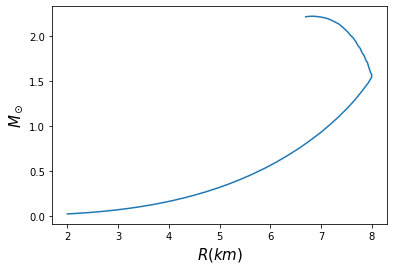

In [14]:
plt.plot(R_data_arry,M_data_arry)
plt.xlabel(r'$R(km)$',fontsize=15)
plt.ylabel(r'$M_\odot$',fontsize=15)
plt.show() # the mass vs radius curve of Cross star

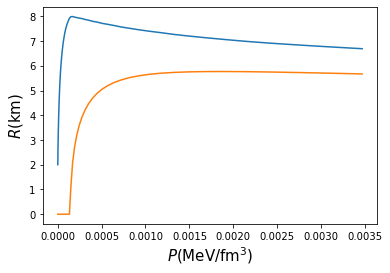

In [16]:
plt.plot(P_c,R_data_arry)
plt.plot(P_c,rc_data_arry)
plt.xlabel(r'$P$(MeV/fm$^3$)',fontsize=15)
plt.ylabel(r'$R$(km)',fontsize=15)
plt.show()
#orange: core radius; blue: whole star radius

In [17]:
def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while f1*f2 > 0.0:
        if x1 >= b:
            return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    return x1,x2

def bisect(f,x1,x2,switch=0,epsilon=1.0e-4): #def bisect(f,x1,x2,switch=0,epsilon=1.0e-4):
    f1 = f(x1)
    if f1 == 0.0:
        return x1
    f2 = f(x2)
    if f2 == 0.0:
        return x2
    if f1*f2 > 0.0:
        print('Root is not bracketed')
        return None
    n = int(math.ceil(math.log(abs(x2 - x1)/epsilon)/math.log(2.0)))
    print('iteration number is [%f]' % (n))
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) >abs(f1)) and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0:
            return x3
        if f2*f3 < 0.0:
            x1 = x3
            f1 = f3
        else:
            x2 =x3
            f2 = f3
    return (x1 + x2)/2.0

def roots(n_num, f, a, b, eps=1e-2):#eps=1e-2
    root_val = []
    print ('The roots on the interval [%f, %f] are:' % (a,b))
    n=0
    while n<n_num:
        x1,x2 = rootsearch(f,a,b,eps)
        print(x1,x2)
        if x1 != None:
            a = x2
            root = bisect(f,x1,x2,1)
            if root != None:
                pass
                print (round(root,-int(math.log(1e-6, 10))))
                root_val.append(root)
                n=n+1
            else: print('None Root')
        else:
            print ('not Done')#\nDone
            break
    return root_val


In [18]:
def f_quark_star(omega):
    coeff = [l,omega]
    solver = ode(Non_radal).set_integrator(backend,nsteps =1000000, rtol = 1e-10, atol = 1e-25)#dphi_re/100
    
    solver.set_solout(solout2)
    solver.set_initial_value(y00,r0).set_f_params(coeff)
    solver.integrate(R_data)
    sol_res = np.array(sol2)
    
    [r,m, P, Phi, W, V] = sol_res[-1,:]
    Phi =  np.log((1- 2*G*m/c**2/r))/2
    dPhi_dr = (m+4*np.pi*r**3*P/c**2) * 1/r**2 * 1/(1/G-2*m/c**2/r)
    LLam = np.sqrt(1/(1- 2*G*m/c**2/r))
    PPhi = np.exp(2*Phi)
    #print(R_data)
    return omega**2 * LLam/PPhi * V + 1/r**2 *dPhi_dr*W
def f_cross_star(omega):
    
    
    coeff = [l,omega]
    solver = ode(Non_radal).set_integrator(backend,nsteps =1000000, rtol = 1e-10, atol = 1e-25)#dphi_re/100
    
    solver.set_solout(solout2)
    solver.set_initial_value(y00,r0).set_f_params(coeff)
    solver.integrate(rc)
    sol_res = np.array(sol2)

    

    [r, m, P,Phi, W, V] = sol_res[-1,:]
    


   
    dPhi_dr = (m+4*np.pi*r**3*P/c**2) * 1/r**2 * 1/(1/G-2*m/c**2/r)
    LLam = np.sqrt(1/(1- 2*G*m/c**2/r))
    PPhi = np.exp(2*Phi)
    
    rho_d = np.interp(P, EOS[:,1], EOS[:,2])
    rho_u = 3*P + 4*B
    
        
    

    V  = PPhi/(omega*r)**2* ((rho_d+P)/(rho_u+P)*(omega**2*r**2/PPhi*V + dPhi_dr*W/LLam)- dPhi_dr*W/LLam)
    y0 = [m, P, Phi, W, V]
    
    solver = ode(Non_radal).set_integrator(backend,nsteps =1000000, rtol = 1e-10, atol = 1e-25)#dphi_re/100
    
    solver.set_solout(solout2)
    solver.set_initial_value(y0,r).set_f_params(coeff)
    solver.integrate(R_data)
    sol_res = np.array(sol2)
        
    [r,m, P,Phi, W, V] = sol_res[-1,:]
    #PhiR =  np.log((1- 2*G*m/c**2/r))/2
    dPhi_dr = (m+4*np.pi*r**3*P/c**2) * 1/r**2 * 1/(1/G-2*m/c**2/r)
    LLam = np.sqrt(1/(1- 2*G*m/c**2/r))
    PPhi = np.exp(2*Phi)
    #print(omega,omega**2 * LLam/PPhi * V + 1/r**2 *dPhi_dr*W, W, V)
    
    return omega**2 * LLam/PPhi * V + 1/r**2 *dPhi_dr*W

In [19]:
sol1 = []
sol2 = []

backend = 'dopri5'
l = 2
const = 0.1

r0=1e-7
r1=40

test_data = []

In [20]:

M_data_arry = []
R_data_arry = []
P_data_arry = []
omega_val = []

for i in range(len(P_c)):
    soltov = []
    P = P_c[i]
    m = 4*pi*r0**3/3*inveos(P,P_cr )

    
    M_data, R_data, P_data, Phic_data, rc = star_info(P) #the most outer layer
    print('rc is [%f]' % (rc))
    M_data_arry.append(M_data)
    R_data_arry.append(R_data)
    

    P = P_c[i]
    m = 4*pi*r0**3/3*inveos(P,P_cr)

    W = const*r0**(l+1)
    V = -const*r0**(l)/l
    LLam =  np.sqrt(1/(1- 2*G*m/c**2/r0))
    Phi =  Phic_data

    y00 = [m, P, Phi, W, V]

    
    print('========================================')
    if rc==r0:
        omega_val.append(roots(1,f_quark_star, 0.001, 0.12))#omega_val.append(roots(1,f_quark_star, 0.001, 0.12))
    else:
        print('two modes')
        omega_val.append(roots(2,f_cross_star, 0.001, 0.12))

rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000001
iteration number is [7.000000]
0.06932
rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000001
iteration number is [7.000000]
0.06932
rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000001
iteration number is [7.000000]
0.06932
rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000001
iteration number is [7.000000]
0.06932
rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000001
iteration number is [7.000000]
0.06924
rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000001
iteration number is [7.000000]
0.06924
rc is [0.000000]
The roots on the interval [0.001000, 0.120000] are:
0.061000000000000006 0.07100000000000

In [ ]:
import csv

lenf=len(M_data_arry)
MwlistAll= [[M_data_arry[i]] + omega_val[i] for i in range(lenf)]

with open("MwlistAll_B50a4min.csv", mode="w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(MwlistAll)

In [ ]:
with open("MwlistAll_B50a4min.csv", mode="r") as csvfile:
    reader = csv.reader(csvfile)
    MwlistRead = [np.array(row, dtype=float).tolist() for row in reader]
MlistRead= [MwlistRead[i][0] for i in range(lenf)]
wlistRead=[MwlistRead[i][1:len(MwlistRead[i])+1] for i in range(lenf)]

In [ ]:
omega_arr=np.array(omega_val[:,0])
omega_arr

In [54]:
omega1_data=[]
omega2_data=[]

for i in range(len(omega_val)):
    if len(omega_val[i])==1:
        omega1_data.append(omega_val[i][0])

    if len(omega_val[i])==2:
        omega2_data.append(omega_val[i][0])
        omega1_data.append(omega_val[i][1])

In [55]:
listf=[x//HertzToCGM//(2*3.1415926) for x in omega1_data]
listf2=[x//HertzToCGM//(2*3.1415926) for x in omega2_data]

In [39]:
lenf=len(M_data_arry)

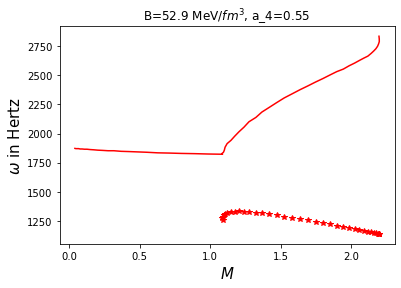

In [56]:
plt.plot(M_data_arry,listf,'r-')
plt.plot(M_data_arry[lenf-len(listf2):lenf],listf2,'r*')
plt.xlabel(r'$M$',fontsize=15)
plt.ylabel(r'$\omega$ in Hertz',fontsize=15)
plt.title(r'B=35 MeV/$fm^3$, a_4=0.55')
plt.show()